In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import random
import warnings

warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_excel("1year.xlsx")

In [ ]:
data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Column16310,Column16311,Column16312,Column16313,Column16314,Column16315,Column16316,Column16317,Column16318,Column16319
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,0.038665,0.071884,0.48884,7.8004,221.01,0.038665,0.045892,11.068,1.0765,0.7956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7008,0.001091,0.8516,0.003463,1.0086,-44.467,0.086248,0.001091,0.17429,1.0297,0.14842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7009,-0.091442,0.7055,-0.047216,0.92568,-7.2952,0,-0.090374,0.41744,9.1345,0.2945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7010,0.13809,3.3357,-2.364,0.29128,-88.382,-3.3963,0.13809,-0.70021,9.9852,-2.3357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(7012, 16384)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Columns: 16384 entries, Attr1 to Column16319
dtypes: float64(16334), int64(1), object(49)
memory usage: 876.5+ MB


In [ ]:
data.isnull().any()

Attr1          False
Attr2          False
Attr3          False
Attr4          False
Attr5          False
               ...  
Column16315     True
Column16316     True
Column16317     True
Column16318     True
Column16319     True
Length: 16384, dtype: bool

In [ ]:
data = data.dropna(axis=1, how='all')

In [ ]:
data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,0.038665,0.071884,0.48884,7.8004,221.01,0.038665,0.045892,11.068,1.0765,0.7956,...,0.071070,0.048599,0.92893,0,2.147,1.4679,53.735,6.7926,1.1116,1
7008,0.001091,0.8516,0.003463,1.0086,-44.467,0.086248,0.001091,0.17429,1.0297,0.14842,...,-0.198900,0.007349,0.97403,2.0331,6.8515,4.1096,142.830,2.5556,1.7346,1
7009,-0.091442,0.7055,-0.047216,0.92568,-7.2952,0,-0.090374,0.41744,9.1345,0.2945,...,0.000966,-0.31049,1.00740,0.077583,72.893,20.79,25.384,14.379,22.18,1
7010,0.13809,3.3357,-2.364,0.29128,-88.382,-3.3963,0.13809,-0.70021,9.9852,-2.3357,...,0.011347,-0.059122,0.97866,0,231.9,12.651,121.930,2.9935,351.85,1


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7012 non-null   object 
 1   Attr2   7012 non-null   object 
 2   Attr3   7012 non-null   object 
 3   Attr4   7012 non-null   object 
 4   Attr5   7012 non-null   object 
 5   Attr6   7012 non-null   object 
 6   Attr7   7012 non-null   object 
 7   Attr8   7012 non-null   object 
 8   Attr9   7012 non-null   object 
 9   Attr10  7012 non-null   object 
 10  Attr11  7012 non-null   object 
 11  Attr12  7012 non-null   object 
 12  Attr13  7012 non-null   float64
 13  Attr14  7012 non-null   object 
 14  Attr15  7012 non-null   object 
 15  Attr16  7012 non-null   object 
 16  Attr17  7012 non-null   object 
 17  Attr18  7012 non-null   object 
 18  Attr19  7012 non-null   float64
 19  Attr20  7012 non-null   float64
 20  Attr21  7012 non-null   object 
 21  Attr22  7012 non-null   object 
 22  

array([[<Axes: title={'center': 'Attr13'}>,
        <Axes: title={'center': 'Attr19'}>,
        <Axes: title={'center': 'Attr20'}>,
        <Axes: title={'center': 'Attr23'}>],
       [<Axes: title={'center': 'Attr30'}>,
        <Axes: title={'center': 'Attr31'}>,
        <Axes: title={'center': 'Attr39'}>,
        <Axes: title={'center': 'Attr42'}>],
       [<Axes: title={'center': 'Attr43'}>,
        <Axes: title={'center': 'Attr44'}>,
        <Axes: title={'center': 'Attr49'}>,
        <Axes: title={'center': 'Attr55'}>],
       [<Axes: title={'center': 'Attr56'}>,
        <Axes: title={'center': 'Attr58'}>,
        <Axes: title={'center': 'Attr62'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

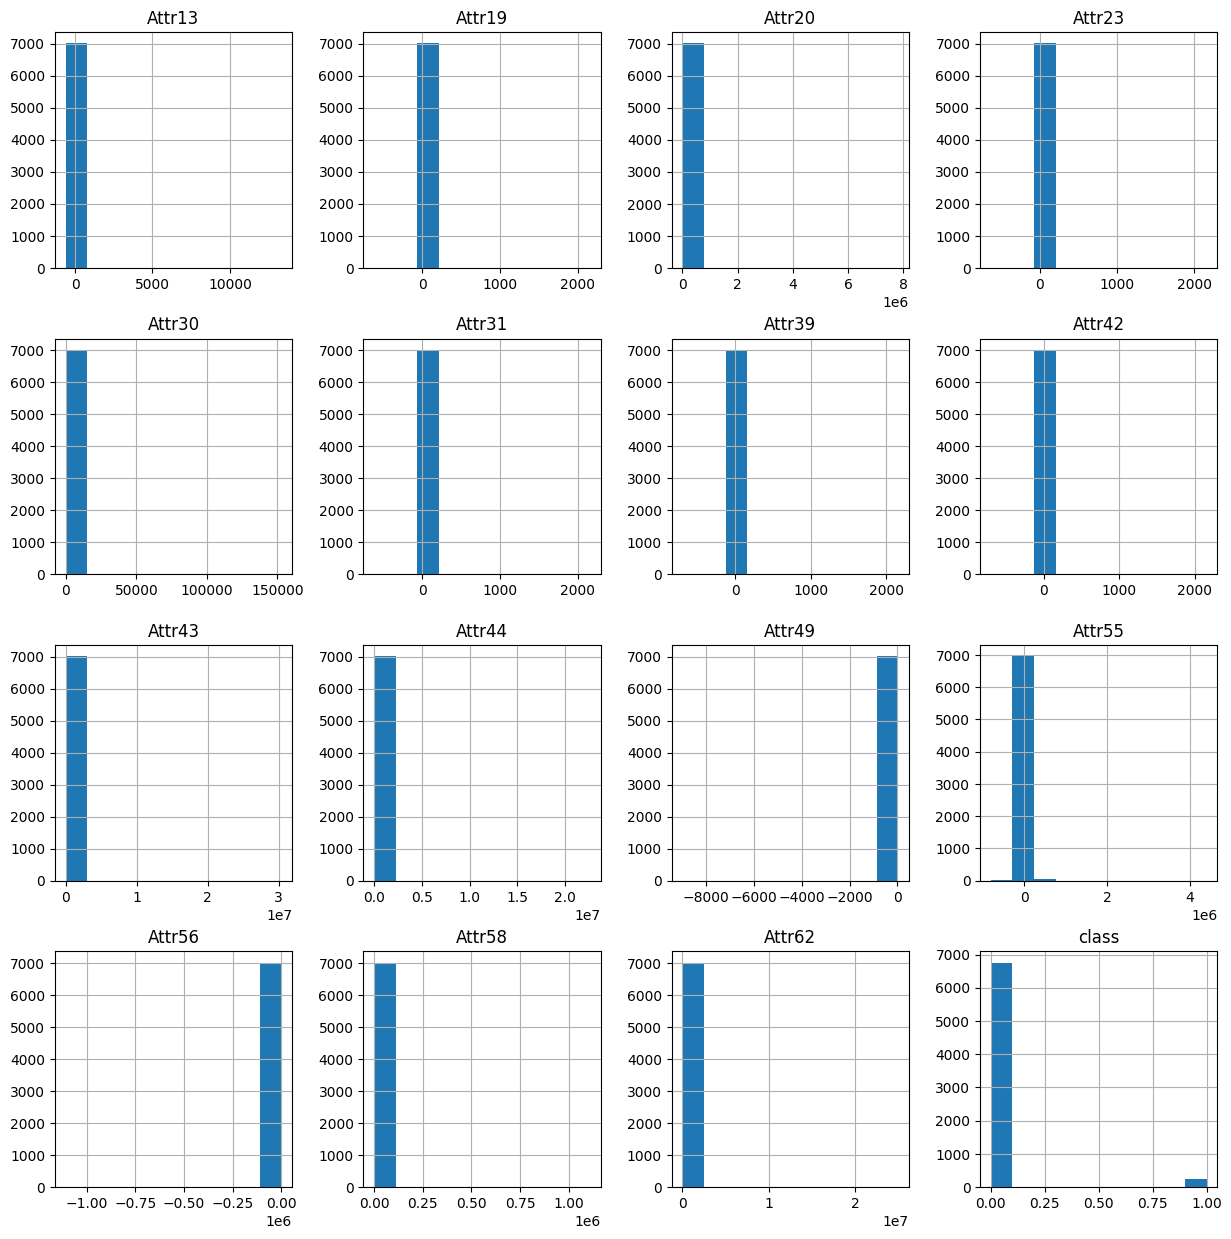

In [ ]:
data.hist(figsize=(15,15))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data.drop('class', axis=1)

In [ ]:
scaler = StandardScaler(copy=False)

In [ ]:
X.select_dtypes(exclude='number').columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr14', 'Attr15', 'Attr16',
       'Attr17', 'Attr18', 'Attr21', 'Attr22', 'Attr24', 'Attr25', 'Attr26',
       'Attr27', 'Attr28', 'Attr29', 'Attr32', 'Attr33', 'Attr34', 'Attr35',
       'Attr36', 'Attr37', 'Attr38', 'Attr40', 'Attr41', 'Attr45', 'Attr46',
       'Attr47', 'Attr48', 'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54',
       'Attr57', 'Attr59', 'Attr60', 'Attr61', 'Attr63', 'Attr64'],
      dtype='object')

In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(X.mean(), inplace=True)


In [ ]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [ ]:
y=data['class']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
X_scaled.shape

(7012, 64)

In [ ]:
X_resampled.shape

(13512, 64)

In [ ]:
y.value_counts(normalize=True)

0    0.963491
1    0.036509
Name: class, dtype: float64

In [ ]:
y_resampled.value_counts(normalize=True)

0    0.5
1    0.5
Name: class, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3)

In [ ]:
x_train.shape


(9458, 64)

In [ ]:
y_train.shape


(9458,)

In [ ]:
x_test.shape

(4054, 64)

In [ ]:
y_test.shape

(4054,)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC(kernel='rbf',random_state=0)
svm.fit(x_train,y_train)

SVC(random_state=0)

In [ ]:
y_pred_svc=svm.predict(x_test)

In [ ]:
svm.score(x_train,y_train)

0.6618735462042715

In [ ]:
svm.score(x_test,y_test)

0.666255550074001

In [ ]:
accuracy_svc=svm.score(x_test,y_test)

In [ ]:
accuracy_svc*100

66.6255550074001

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt=dt.predict(x_test)

In [ ]:
dt.score(x_train,y_train)

1.0

In [ ]:
dt.score(x_test,y_test)

0.9546127281697089

In [ ]:
from sklearn import metrics


In [ ]:
accuracy_dt=metrics.accuracy_score(y_test,y_pred_dt)

In [ ]:
accuracy_dt*100

95.46127281697089

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
rand_forest=RandomForestClassifier(random_state=42)

In [ ]:
rand_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rand_forest.score(x_train,y_train)

1.0

In [ ]:
rand_forest.score(x_test,y_test)

0.9876665022200296

In [ ]:
accuracy_rf=rand_forest.score(x_test,y_test)

In [ ]:
accuracy_rf*100

98.76665022200297

In [ ]:
accuracy_df=pd.DataFrame({'Model':['SVM','DecisionTree','Randomforest'],'Accuracy':[accuracy_svc*100,accuracy_dt*100,accuracy_rf*100]})

In [ ]:
accuracy_df

,Model,Accuracy
0,SVM,66.625555
1,DecisionTree,95.461273
2,Randomforest,98.766650


Text(0, 0.5, 'Accuracy')

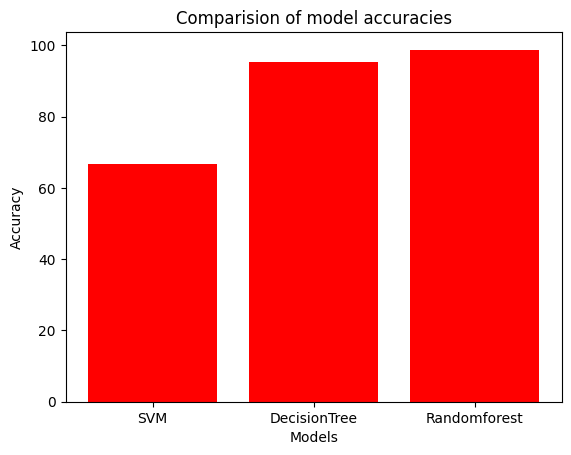

In [ ]:
models=['SVM','DecisionTree','Randomforest']
accuracies=[accuracy_svc*100, accuracy_dt*100, accuracy_rf*100]
plt.bar(models,accuracies,color='red')
plt.title('Comparision of model accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

In [ ]:
import pickle
best_model = rand_forest

In [ ]:
with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
with open('best_random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
loaded_model.predict([[0.050978,	0.70647,	-0.17756	,0.74327,	-71.33	,0.077842,	0.064406	,0.31079,	1.0238,	0.21957	,0.064406	,0.093125,	0.059905	,0.064406	,2113.8	,0.17267,	1.4155	,0.064406	,0.031628,	36.518	,1.0468,	0.070006	,0.025034,	0.099343	,0.21957,	0.15367,	0.35197	,-0.36538,	4.1511	,0.34589,	0.031628	,126.92,	2.8759,	0.099091,	0.070006,	2.0662	,20.871,	0.23443	,0.034377,	0.005043,	0.18204	,0.034377	,91.513	,54.994	,0.25021,	0.44868,	37.388,	0.012421	,0.0061	,0.72763	,0.69161	,0.34772	,0.45183,	0.48242	,-2514.3	,0.023277,	0.23218	,0.97672,	0.067714,	9.995	,6.637	,123.96	,2.9444	,4.1905	]])

array([0])

In [ ]:
!pip install flask-ngrok